In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#EDA - Exploratory Data Analysis

In [2]:
!cp "/content/drive/MyDrive/heartbeat.zip" "/content/"

In [3]:
!unzip *.zip && rm -rf *.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

**Understanding Data**

In [3]:
# ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [4]:
# N ---> Normal              
# Q ---> Unknown Beats        
# V ---> Ventricular          
# S ---> Supraventricular     
# F ---> Fusion Beats          

In [5]:
data = pd.read_csv("mitbih_train.csv", header=None, index_col=False)

In [6]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,0.052632,0.140351,0.119298,0.091228,0.140351,0.161404,0.105263,0.143860,0.143860,0.129825,0.147368,0.157895,0.164912,0.168421,0.154386,0.175439,0.164912,0.154386,0.182456,0.192982,0.196491,0.207018,0.217544,0.217544,0.256140,0.284211,0.294737,0.301754,0.301754,0.322807,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,0.078333,0.183333,0.275000,0.315000,0.361667,0.430000,0.481667,0.526667,0.543333,0.563333,0.581667,0.588333,0.600000,0.603333,0.613333,0.621667,0.636667,0.651667,0.665000,0.681667,0.700000,0.711667,0.735000,0.763333,0.785000,0.810000,0.835000,0.856667,0.876667,0.880000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,0.097959,0.048980,0.036735,0.053061,0.053061,0.097959,0.183673,0.269388,0.351020,0.408163,0.436735,0.469388,0.481633,0.518367,0.530612,0.534694,0.555102,0.591837,0.628571,0.632653,0.624490,0.616327,0.616327,0.608163,0.608163,0.620408,0.628571,0.624490,0.632653,0.644898,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,0.101266,0.101266,0.088608,0.081013,0.073418,0.065823,0.065823,0.053165,0.048101,0.037975,0.035443,0.025316,0.020253,0.020253,0.017722,0.002532,0.005063,0.007595,0.000000,0.010127,0.010127,0.015190,0.035443,0.040506,0.050633,0.058228,0.070886,0.086076,0.098734,0.106329,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
87553,0.901506,0.845886,0.800695,0.748552,0.687138,0.599073,0.512167,0.427578,0.395133,0.402086,0.370800,0.287370,0.236385,0.324450,0.403244,0.409038,0.407880,0.390498,0.390498,0.419467,0.443801,0.487833,0.544612,0.574739,0.582851,0.592121,0.601390,0.611819,0.624565,0.634994,0.650058,0.661645,0.677868,0.691773,0.712630,0.726535,0.741599,0.749710,0.761298,0.763615,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


In [8]:
data[187].unique()

array([0., 1., 2., 3., 4.])

In [9]:
data[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

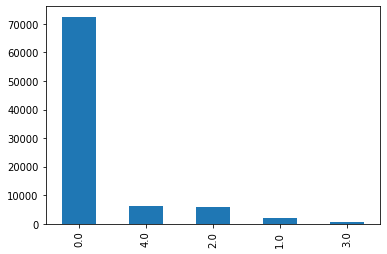

In [10]:
data[187].value_counts().plot(kind="bar")

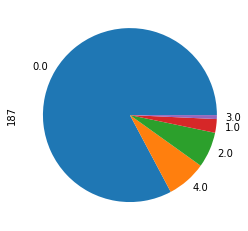

In [11]:
data[187].value_counts().plot(kind="pie")

In [12]:
print("Data has {} rows and {} columns.".format(data.shape[0], data.shape[1]))

Data has 87554 rows and 188 columns.


In [13]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,...,0.030729,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023932,0.023060,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.218450,0.221486,0.224031,0.225848,0.227133,0.227830,0.228436,0.228871,0.228760,0.228393,0.227472,0.226180,0.224659,0.223110,0.221352,0.219258,0.216884,0.214168,...,0.116516,0.114463,0.112686,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.052840,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,0.070543,0.069182,0.068293,0.067744,0.070175,0.072993,0.074803,0.075972,0.076923,0.077872,0.079442,0.081911,0.085938,0.090032,0.094595,0.098901,0.103960,0.109348,0.114754,0.120730,0.127946,0.135962,0.144295,0.151852,0.157895,0.161035,0.161133,0.159383,0.157343,0.155388,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [14]:
data.nunique()

0      23408
1      42845
2      49611
3      41007
4      39328
       ...  
183      920
184      843
185      778
186      748
187        5
Length: 188, dtype: int64

**Cleaning the Data**

In [15]:
data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [31]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [17]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Relationship Analysis**

In [ ]:
corelation = X_data.corr()

Relationship between all numerical columns

In [18]:
# sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

Relationship between two numerical or categorical columns

In [19]:
# sns.pairplot(X_data)

Relationship between two numerical columns with respect to some column

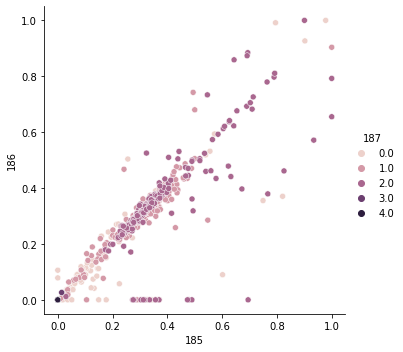

In [20]:
sns.relplot(x = 185, y = 186, hue=187, data=data)

Is to check distribution of data or particular column in the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


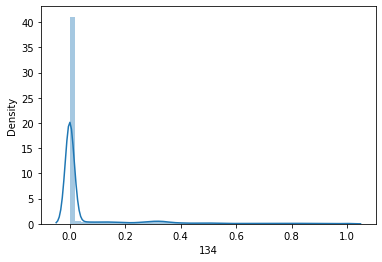

In [21]:
sns.distplot(data[134])

In [22]:
# as we see more values lies on 0

Another plot to check distribution of particular column in data basically box plot is for categorical coulmns

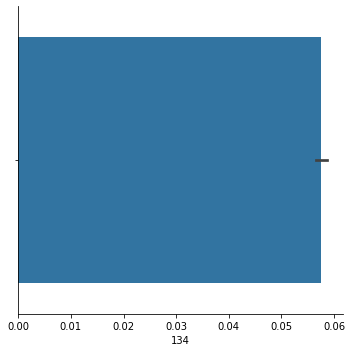

In [23]:
sns.catplot(x=134, kind="bar", data=data)

**Spliting Dataset**

In [32]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

In [33]:
from sklearn.utils import shuffle
x, y=shuffle(X, Y)
x, y = x.values, y.values

Using SMOTE to handle imbalance dataset

In [34]:
from collections import Counter
counter_before = Counter(y)
print(counter_before)

Counter({0.0: 72471, 4.0: 6431, 2.0: 5788, 1.0: 2223, 3.0: 641})


In [35]:
#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_data, y_data = oversample.fit_resample(x, y)

In [36]:
from collections import Counter
counter_after = Counter(y_data)
print(counter_after)

Counter({0.0: 72471, 2.0: 72471, 4.0: 72471, 3.0: 72471, 1.0: 72471})


In [37]:
labels = to_categorical(y_data, num_classes=5).astype(int)

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, random_state=42, test_size=0.2)

In [39]:
X_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [40]:
x_train.shape

(289884, 187)

In [41]:
x_test.shape

(72471, 187)

In [42]:
y_train.shape

(289884, 5)

In [43]:
y_test.shape

(72471, 5)

In [44]:
print("X Train shape: ", x_train.shape)
print("X Test shape: ", x_test.shape)

X Train shape:  (289884, 187)
X Test shape:  (72471, 187)


**Model**

In [45]:
import tensorflow as tf

In [65]:
# Conv Layers

inp = tf.keras.layers.Input(shape=(x_train.shape[1],1))
u1 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(inp)
u2 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u1)
u3 = tf.keras.layers.Dropout(rate=0.2)(u2)
u4 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u3)
u5 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u4)
u6 = tf.keras.layers.Dropout(rate=0.2)(u5)
u7 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u6)
u8 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u7)
u9 = tf.keras.layers.Dropout(rate=0.2)(u8)

f = tf.keras.layers.Flatten()(u9)
l1 = tf.keras.layers.Dense(units=512)(f)
l2 = tf.keras.layers.LeakyReLU(alpha=0.001)(l1)
l3 = tf.keras.layers.BatchNormalization()(l2)
l4 = tf.keras.layers.Dense(units=256)(l3)
l5 = tf.keras.layers.LeakyReLU(alpha=0.001)(l4)
l6 = tf.keras.layers.BatchNormalization()(l5)
l7 = tf.keras.layers.Dense(units=128)(l6)
l8 = tf.keras.layers.LeakyReLU(alpha=0.001)(l7)
l9 = tf.keras.layers.BatchNormalization()(l8)
l10 = tf.keras.layers.Dense(units=5)(l9)
outputs = tf.keras.layers.Activation("softmax")(l10)

model = tf.keras.models.Model(inputs = [inp], outputs = [outputs])

In [66]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 187, 32)           128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 93, 32)           0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 93, 32)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 93, 64)            6208      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 46, 64)           0         
 1D)                                                       

In [67]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [68]:
earlyStopping = tf.keras.callbacks.EarlyStopping(patience=10,mode='max',monitor='val_loss',restore_best_weights=True)
reduceLR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.0001)
modelCheck = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5',monitor='val_loss',save_best_only=True)
callbacks=[earlyStopping,reduceLR,modelCheck]

In [69]:
BATCH = 256
EPOCHS = 30

In [70]:
history = model.fit(
  x_train, y_train,
  validation_data=(x_test ,y_test),
  epochs=EPOCHS,
  batch_size=BATCH
  # callbacks=callbacks
)

Epoch 1/30
1133/1133 [==============================] - 22s 18ms/step - loss: 0.2105 - accuracy: 0.9237 - val_loss: 0.1641 - val_accuracy: 0.9390
Epoch 2/30
1133/1133 [==============================] - 20s 18ms/step - loss: 0.0851 - accuracy: 0.9698 - val_loss: 0.0527 - val_accuracy: 0.9814
Epoch 3/30
1133/1133 [==============================] - 20s 18ms/step - loss: 0.0598 - accuracy: 0.9789 - val_loss: 0.0381 - val_accuracy: 0.9874
Epoch 4/30
1133/1133 [==============================] - 20s 18ms/step - loss: 0.0485 - accuracy: 0.9830 - val_loss: 0.0321 - val_accuracy: 0.9888
Epoch 5/30
1133/1133 [==============================] - 20s 18ms/step - loss: 0.0415 - accuracy: 0.9857 - val_loss: 0.0297 - val_accuracy: 0.9902
Epoch 6/30
1133/1133 [==============================] - 20s 17ms/step - loss: 0.0369 - accuracy: 0.9871 - val_loss: 0.0283 - val_accuracy: 0.9897
Epoch 7/30
1133/1133 [==============================] - 19s 17ms/step - loss: 0.0335 - accuracy: 0.9886 - val_loss: 0.0227 -

In [71]:
loss, accuracy = model.evaluate(x_test, y_test)

2265/2265 [==============================] - 10s 5ms/step - loss: 0.0120 - accuracy: 0.9965


Text(0, 0.5, 'Accuracy')

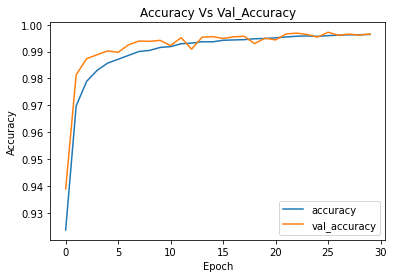

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

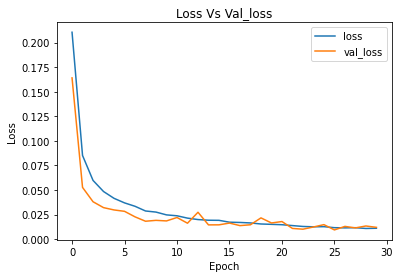

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

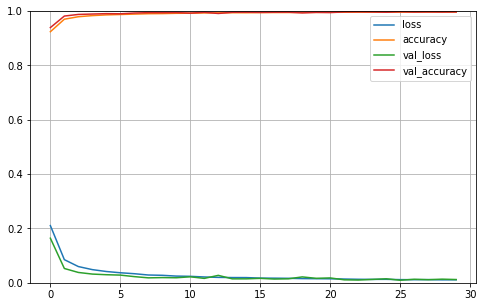

In [74]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [77]:
predictions = model.predict(x_test)

In [78]:
pred = np.argmax(predictions, axis=1)
# label
y_test = np.argmax(y_test, axis=1)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14489
           1       0.99      1.00      1.00     14529
           2       1.00      1.00      1.00     14413
           3       1.00      1.00      1.00     14440
           4       1.00      1.00      1.00     14600

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



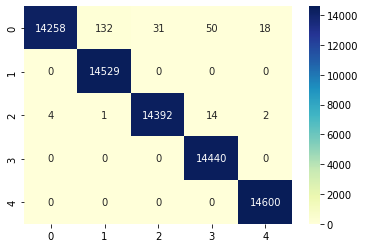

In [81]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [82]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, pred)

In [83]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14489
           1       0.99      1.00      1.00     14529
           2       1.00      1.00      1.00     14413
           3       1.00      1.00      1.00     14440
           4       1.00      1.00      1.00     14600

    accuracy                           1.00     72471
   macro avg       1.00      1.00      1.00     72471
weighted avg       1.00      1.00      1.00     72471



In [84]:
model.save("model.hdf5")

In [98]:
labels = ['Normal', 'Unknown Beats', 'Ventricular', 'Supraventricular', 'Fusion Beats']

In [99]:
for index, idx in enumerate(y_train):
  id = np.argmax(idx, axis=0)
  if id == 0:
    normal = x_train[index]
  if id == 1:
    unknown_beats = x_train[index]
  if id == 2:
    ventricular = x_train[index]
  if id == 3:
    supraventricular = x_train[index]
  if id == 4:
    fusion_beats = x_train[index]

Text(0.5, 1.0, 'Ventricular')

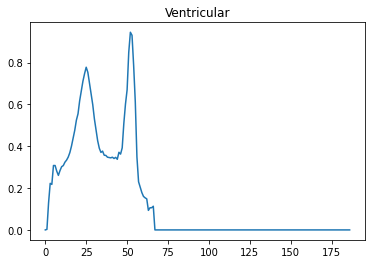

In [102]:
plt.plot(ventricular)
plt.title("Ventricular")

Text(0.5, 1.0, 'Unknown Beats')

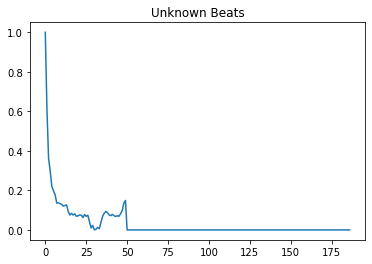

In [101]:
plt.plot(unknown_beats)
plt.title("Unknown Beats")

Text(0.5, 1.0, 'Normal')

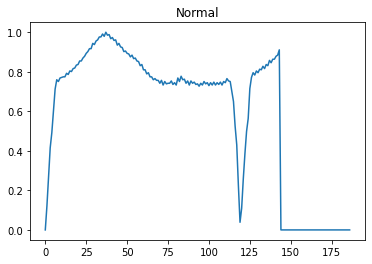

In [104]:
plt.plot(normal)
plt.title("Normal")

Text(0.5, 1.0, 'Supraventricular')

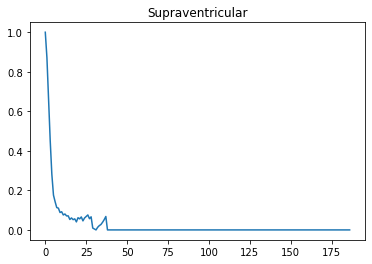

In [105]:
plt.plot(supraventricular)
plt.title("Supraventricular")

Text(0.5, 1.0, 'Fusion Beats')

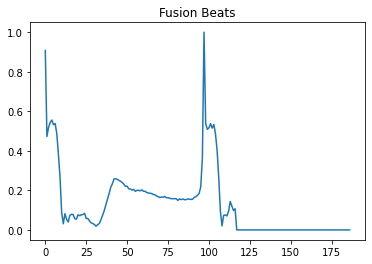

In [106]:
plt.plot(fusion_beats)
plt.title("Fusion Beats")

Implemented By Muhammad Hanan Asghar